In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from mpl_toolkits.mplot3d import Axes3D

In [13]:
def pos_time(beta: np.ndarray, beta_dot: np.ndarray, c=3e8):
    '''Finds motion of a particle until it is 2 m away from origin (|r| = 2).'''

    # Define r(t)
    def r_mag(t):
        pos = c * (beta * t + 0.5 * beta_dot * t**2)
        return np.linalg.norm(pos)

    # Root function: r(t) - 1414 = 0
    def f(t): return r_mag(t) - 1414.0

    # Rough upper time limit (when β+β̇*t ≈ 1)
    t_max = (1 - np.linalg.norm(beta)) / (np.linalg.norm(beta_dot) + 1e-12)

    # Find T such that |r| = 2 m
    sol = root_scalar(f, bracket=[0, t_max], method='brentq')
    T = sol.root

    # Make time array
    t = np.linspace(0, T, 1000)

    # Compute positions
    x = c * (beta[0]*t + 0.5*beta_dot[0]*t**2)
    y = c * (beta[1]*t + 0.5*beta_dot[1]*t**2)
    z = c * (beta[2]*t + 0.5*beta_dot[2]*t**2)

    return t, x, y, z


In [14]:
def fields(beta: np.ndarray, beta_dot: np.ndarray, obs: np.ndarray, c=3e8, q=1, factor=9e9):
    '''Finds the radiation electric and magnetic fields at the observer point as functions of time.'''

    # Get the time and position arrays
    t, x, y, z = pos_time(beta, beta_dot, c)

    E = np.zeros((len(t), 3))
    B = np.zeros((len(t), 3))

    for i in range(len(t)):
        # Vector from source to observer
        r_vec = obs - np.array([x[i], y[i], z[i]])
        R = np.linalg.norm(r_vec)
        n = r_vec / R  # unit vector from source to observer

        # Instantaneous velocity and acceleration
        b = beta + beta_dot * t[i]

        # Liénard–Wiechert radiation field 
        # E_rad = (q / (4πϵ₀ c)) * [ n × ((n - β) × β̇) ] / [ (1 - n·β)^3 R ]
        num = np.cross(n, np.cross((n - b), beta_dot))
        denom = (1 - np.dot(n, b))**3 * R
        E[i] = (q * factor / c) * num / denom
        B[i] = np.cross(n, E[i]) / c

    # Return components for plotting
    Ex, Ey, Ez = E[:,0], E[:,1], E[:,2]
    Bx, By, Bz = B[:,0], B[:,1], B[:,2]
    return t, Ex, Ey, Ez, Bx, By, Bz, x, y, z


In [15]:
def plot_fields(beta: np.ndarray, beta_dot: np.ndarray, obs: np.ndarray):
    '''Computes and plots Ex,Ey,Ez,Bx,By,Bz vs time, and shows particle trajectory + observer in 3D.'''
    t, Ex, Ey, Ez, Bx, By, Bz, x, y, z = fields(beta, beta_dot, obs)

    fig, axes = plt.subplots(2, 3, figsize=(12, 6))
    axes = axes.flatten()

    # Electric field components
    components_E = [Ex, Ey, Ez]
    labels_E = ['Ex', 'Ey', 'Ez']
    for i in range(3):
        axes[i].plot(t, components_E[i])
        axes[i].set_title(f"{labels_E[i]} vs time")
        axes[i].set_xlabel("Time (s)")
        axes[i].set_ylabel(f"{labels_E[i]} (N/C)")

    # Magnetic field components
    components_B = [Bx, By, Bz]
    labels_B = ['Bx', 'By', 'Bz']
    for i in range(3):
        axes[i+3].plot(t, components_B[i])
        axes[i+3].set_title(f"{labels_B[i]} vs time")
        axes[i+3].set_xlabel("Time (s)")
        axes[i+3].set_ylabel(f"{labels_B[i]} (T)")

    plt.suptitle(f"Evolution of E and B fields wrt time\nβ = {tuple(beta)} | β_dot = {tuple(beta_dot)}", fontsize=10)
    plt.tight_layout()
    plt.show()

    # ---- Sanity check ----
    print("A quick test: |E| ≈ c|B| for radiation field. Checking at t[10]:")
    i = 10
    print("E_mag =", np.linalg.norm([Ex[i], Ey[i], Ez[i]]))
    print("c*B_mag =", 3e8 * np.linalg.norm([Bx[i], By[i], Bz[i]]))

    # ---- 3D trajectory plot ----
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')

    # Particle trajectory
    ax.plot(x, y, z, label='Particle trajectory', color='blue')
    ax.scatter(x[0], y[0], z[0], color='green', s=10, label='Start')
    ax.scatter(x[-1], y[-1], z[-1], color='red', s=10, label='End')

    # Observer position
    ax.scatter(obs[0], obs[1], obs[2], color='magenta', s=80, marker='*', label='Observer')

    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z (m)')
    ax.set_title('Particle trajectory and observer position')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

## Part A:   
- Given that beta_dot = (0,0,0.3) and initial velocities are (along x)
    - 0.1c
    - 0.9c
    - 0.999c

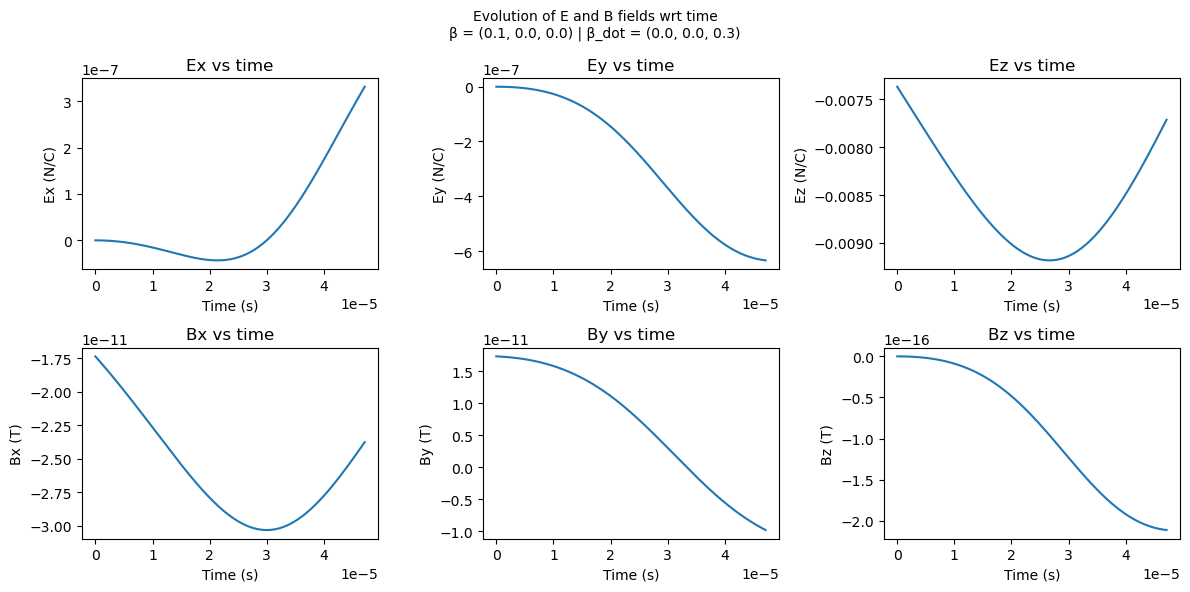

A quick test: |E| ≈ c|B| for radiation field. Checking at t[10]:
E_mag = 0.007413553740857854
c*B_mag = 0.007413553740857854


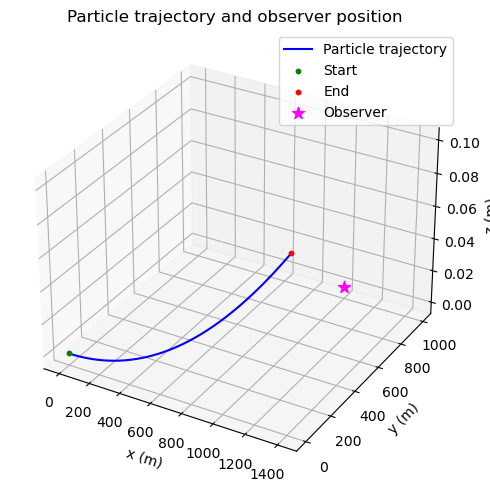

In [16]:
## 0.1c
beta = np.array([0.1, 0.0, 0.0])
beta_dot = np.array([0.0, 0.0, 0.3])
obs = np.array([1000.0, 1000.0, 0.0])

plot_fields(beta, beta_dot, obs)

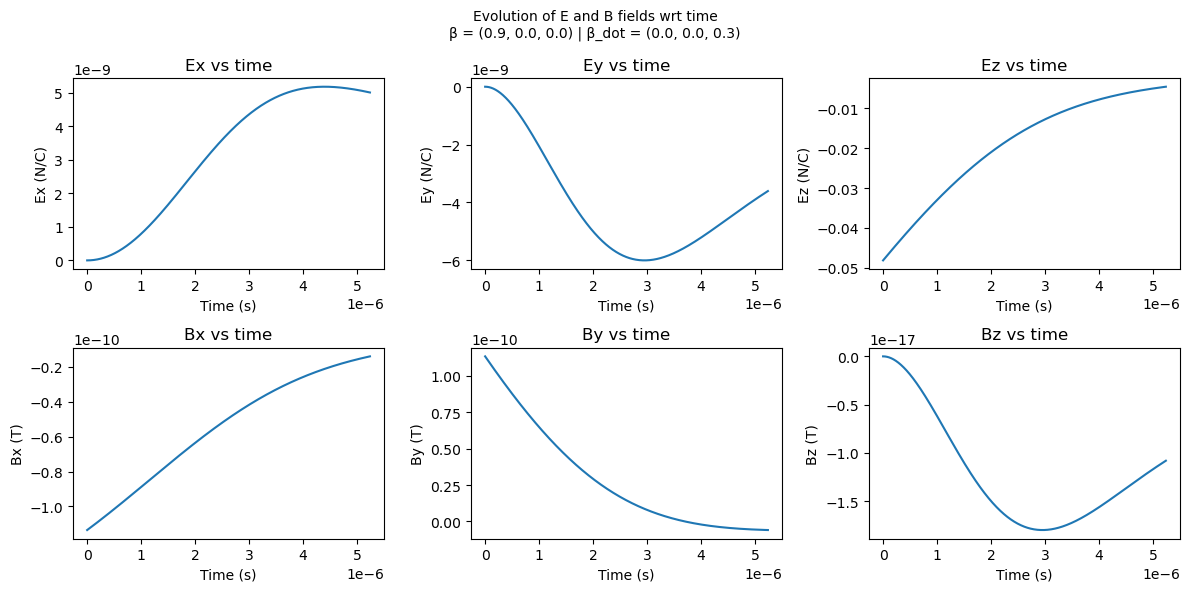

A quick test: |E| ≈ c|B| for radiation field. Checking at t[10]:
E_mag = 0.0472865338816414
c*B_mag = 0.0472865338816414


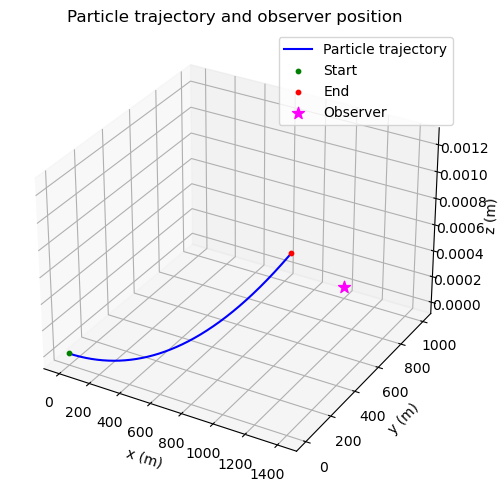

In [17]:
## 0.9c
beta = np.array([0.9, 0.0, 0.0])
beta_dot = np.array([0.0, 0.0, 0.3])
obs = np.array([1000.0, 1000.0, 0.0])

plot_fields(beta, beta_dot, obs)

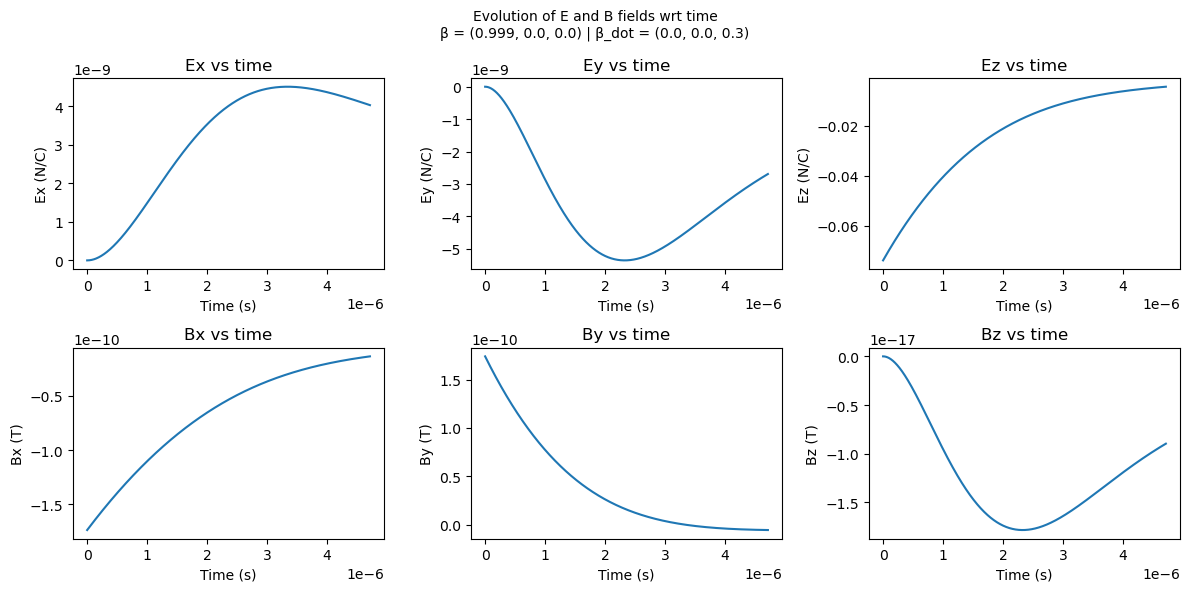

A quick test: |E| ≈ c|B| for radiation field. Checking at t[10]:
E_mag = 0.07185667690323874
c*B_mag = 0.07185667690323874


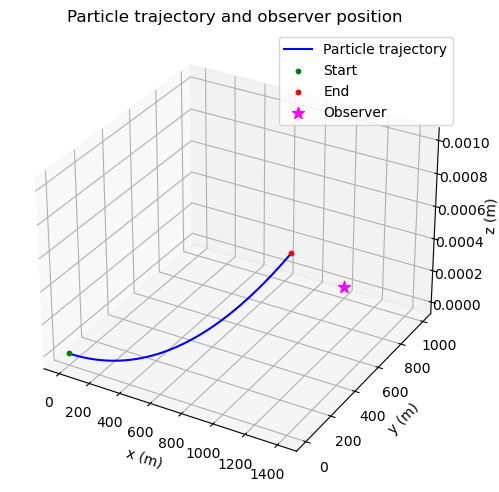

In [18]:
## 0.999c
beta = np.array([0.999, 0.0, 0.0])
beta_dot = np.array([0.0, 0.0, 0.3])
obs = np.array([1000.0, 1000.0, 0.0])

plot_fields(beta, beta_dot, obs)

## Part B:   
- Given that beta_dot = (0.9,0,0) and initial velocities are (along x)
    - 0.1c
    - 0.9c
    - 0.999c

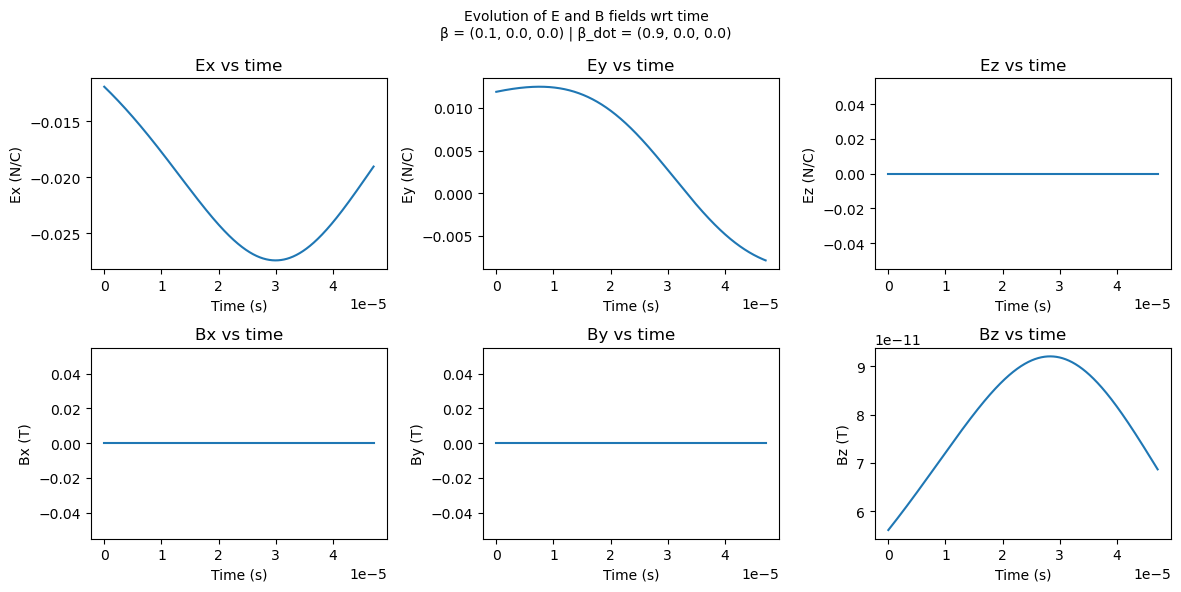

A quick test: |E| ≈ c|B| for radiation field. Checking at t[10]:
E_mag = 0.017034059310255072
c*B_mag = 0.017034059310255076


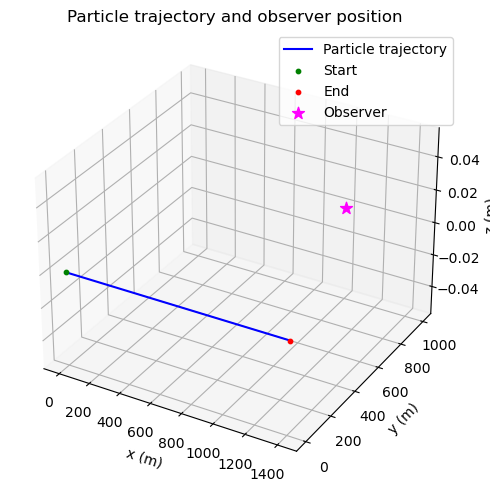

In [19]:
## 0.1c
beta = np.array([0.1, 0.0, 0.0])
beta_dot = np.array([0.9, 0.0, 0.0])
obs = np.array([1000.0, 1000.0, 0.0])

plot_fields(beta, beta_dot, obs)

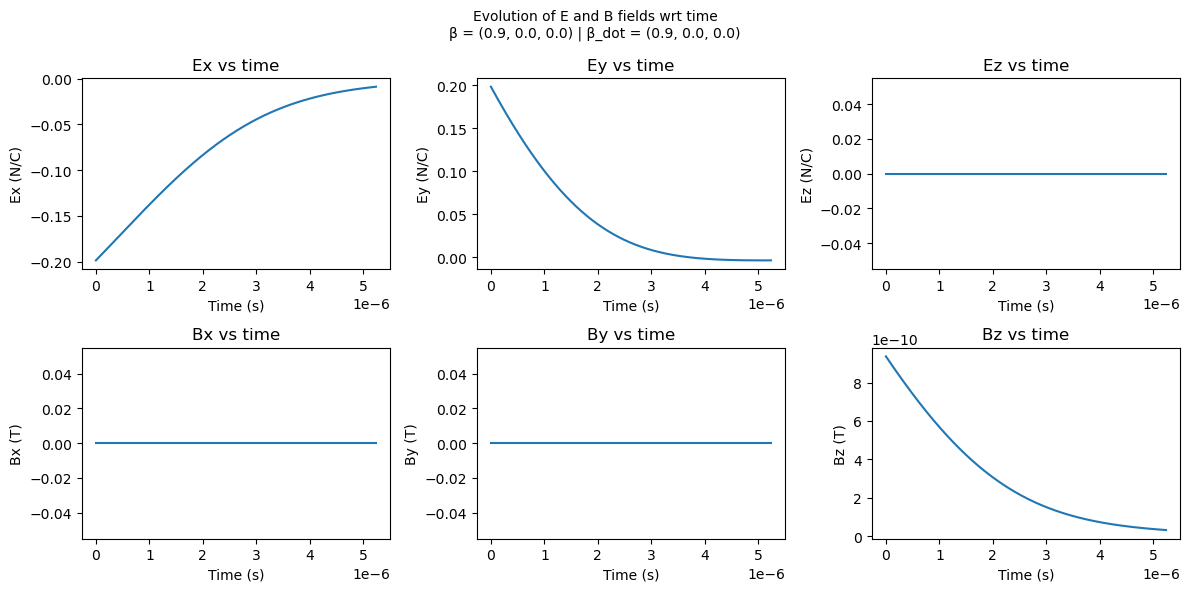

A quick test: |E| ≈ c|B| for radiation field. Checking at t[10]:
E_mag = 0.2744009320638316
c*B_mag = 0.27440093206383154


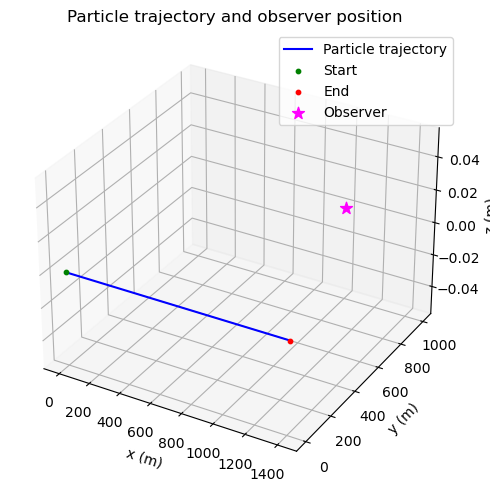

In [20]:
## 0.9c
beta = np.array([0.9, 0.0, 0.0])
beta_dot = np.array([0.9, 0.0, 0.0])
obs = np.array([1000.0, 1000.0, 0.0])

plot_fields(beta, beta_dot, obs)

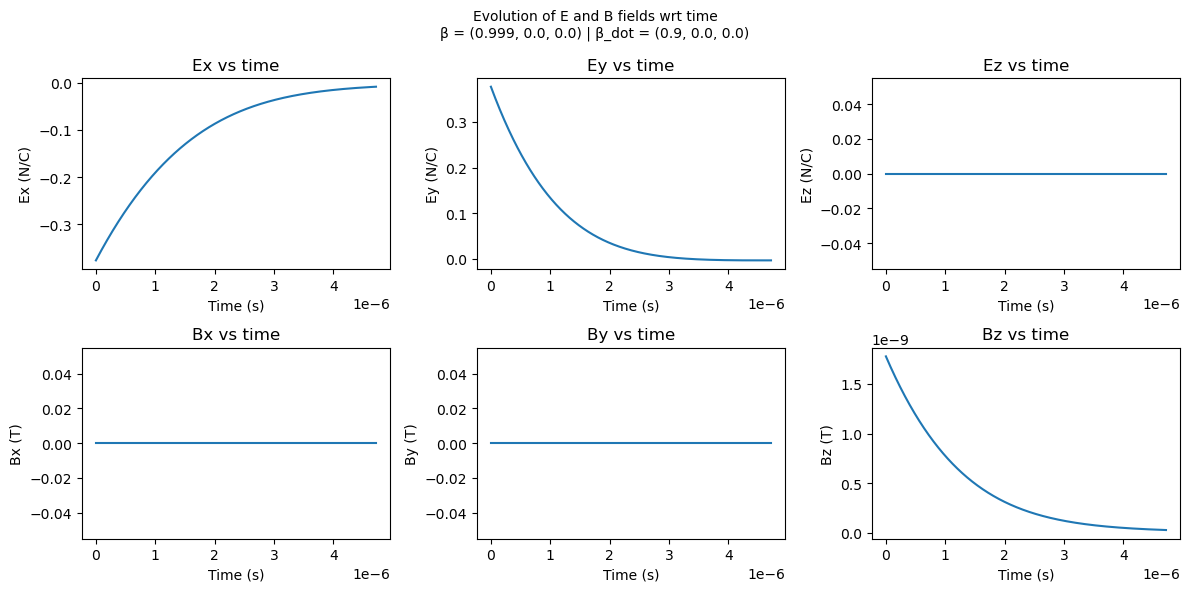

A quick test: |E| ≈ c|B| for radiation field. Checking at t[10]:
E_mag = 0.5140200694284877
c*B_mag = 0.5140200694284875


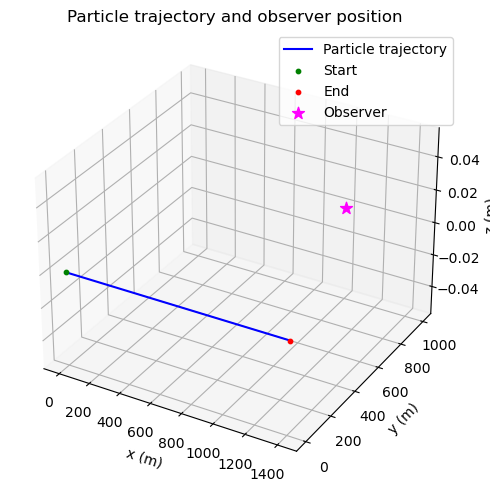

In [21]:
## 0.999c
beta = np.array([0.999, 0.0, 0.0])
beta_dot = np.array([0.9, 0.0, 0.0])
obs = np.array([1000.0, 1000.0, 0.0])

plot_fields(beta, beta_dot, obs)